## Problem Statement

Ratings Data File Structure
All ratings are contained in the file ratings.dat. Each line of this file represents one rating of one movie by one user, and has the following format:

UserID::MovieID::Rating::Timestamp

The lines within this file are ordered first by UserID, then, within user, by MovieID.

Ratings are made on a 5-star scale, with half-star increments.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

Tags Data File Structure
All tags are contained in the file tags.dat. Each line of this file represents one tag applied to one movie by one user, and has the following format:

UserID::MovieID::Tag::Timestamp

The lines within this file are ordered first by UserID, then, within user, by MovieID.

Tags are user generated metadata about movies. Each tag is typically a single word, or short phrase. The meaning, value and purpose of a particular tag is determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

Movies Data File Structure
Movie information is contained in the file movies.dat. Each line of this file represents one movie, and has the following format:

MovieID::Title::Genres

MovieID is the real MovieLens id.

Movie titles, by policy, should be entered identically to those found in IMDB, including year of release. However, they are entered manually, so errors and inconsistencies may exist.

Genres are a pipe-separated list, and are selected from the following:

Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western


Reference: F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872

## Libraries Import

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)

## Import Dataset

In [2]:
# movie_titles_df = pd.read_csv('Movie_Id_Titles')

In [3]:
# movie_titles_df.head(3)

In [4]:
ratings_col = 'UserID::MovieID::Rating::Timestamp'.split('::')
movies_col = 'MovieID::Title::Genres'.split('::')

In [5]:
ratings_raw = pd.read_table('ratings.dat', sep = '::', engine = 'python', header=None, names=ratings_col, encoding='utf-8')

In [6]:
movies_raw = pd.read_table('movies.dat', sep = '::', engine = 'python', header= None, names=movies_col, encoding='utf-8')

In [7]:
## Visualising the movies dataset

In [8]:
movies_raw.head(3)

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [9]:
movies_raw.tail(3)

,MovieID,Title,Genres
10678,65126,Choke (2008),Comedy|Drama
10679,65130,Revolutionary Road (2008),Drama|Romance
10680,65133,Blackadder Back & Forth (1999),Comedy


In [10]:
## Visualising the ratings dataset

In [11]:
ratings_raw.head(3)

,UserID,MovieID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392


In [12]:
ratings_raw.tail(3)

,UserID,MovieID,Rating,Timestamp
10000051,71567,2294,5.0,912577968
10000052,71567,2338,2.0,912578016
10000053,71567,2384,2.0,912578173


In [13]:
## Dropping the timestamp column from the ratings dataset

In [14]:
ratings_raw.drop(columns = 'Timestamp', inplace = True)

In [15]:
ratings_raw.head(3)

,UserID,MovieID,Rating
0,1,122,5.0
1,1,185,5.0
2,1,231,5.0


In [16]:
ratings_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,10000054.0,35869.859409,20585.337355,1.0,18123.0,35740.5,53608.0,71567.0
MovieID,10000054.0,4120.291477,8938.402118,1.0,648.0,1834.0,3624.0,65133.0
Rating,10000054.0,3.512422,1.060418,0.5,3.0,4.0,4.0,5.0


In [17]:
ratings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000054 entries, 0 to 10000053
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   UserID   int64  
 1   MovieID  int64  
 2   Rating   float64
dtypes: float64(1), int64(2)
memory usage: 228.9 MB


In [18]:
movies_rating = pd.merge(movies_raw, ratings_raw, on = 'MovieID')

In [19]:
movies_rating.head(3)

,MovieID,Title,Genres,UserID,Rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,3.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.0


In [20]:
movies_rating.shape

(10000054, 5)

## Data Visualization

In [21]:
# getting the five-point summary of the movies_rating dataframe
movies_rating.groupby('Title')['Rating'].describe().T

Title,"""Great Performances"" Cats (1998)",'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...All the Marbles (a.k.a. The California Dolls) (1981),...And God Created Woman (Et Dieu... créa la femme) (1956),...And God Spoke (1993),...And Justice for All (1979),...,Zorba the Greek (Alexis Zorbas) (1964),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),[Rec] (2007),eXistenZ (1999),ffolks (a.k.a. North Sea Hijack) (1980),loudQUIETloud: A Film About the Pixies (2006),xXx: State of the Union (2005),"Âge d'or, L' (1930)"
count,6.000000,50.000000,302.000000,1504.000000,211.000000,493.000000,23.000000,76.000000,23.000000,609.000000,...,227.000000,260.000000,561.000000,16.000000,71.000000,2908.000000,29.000000,8.000000,323.000000,47.000000
mean,3.583333,3.720000,2.837748,2.969415,3.450237,3.153144,2.217391,3.085526,3.282609,3.652709,...,3.786344,2.951923,3.848485,3.406250,3.774648,3.316369,3.051724,3.750000,2.244582,3.585106
std,1.020621,0.852128,1.136892,1.040463,1.073995,0.865659,1.126399,1.084399,1.126399,0.865834,...,0.882193,1.076511,0.863569,0.663796,1.016959,1.066170,1.205233,0.377964,1.099376,1.095044
min,2.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,2.000000,0.500000,0.500000,1.000000,3.000000,0.500000,0.500000
25%,3.125000,3.000000,2.000000,2.000000,3.000000,2.500000,1.500000,2.375000,2.750000,3.000000,...,3.500000,2.000000,3.500000,3.375000,3.500000,3.000000,2.000000,3.500000,1.500000,3.000000
50%,3.750000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.500000,4.000000,...,4.000000,3.000000,4.000000,3.500000,4.000000,3.500000,3.000000,4.000000,2.000000,4.000000
75%,4.000000,4.500000,4.000000,4.000000,4.000000,3.500000,3.000000,4.000000,4.000000,4.000000,...,4.500000,4.000000,4.500000,3.625000,4.500000,4.000000,4.000000,4.000000,3.000000,4.250000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,4.500000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000


In [22]:
# extracting only the mean of the movies_rating dataframe

ratings_df_mean = movies_rating.groupby('Title')['Rating'].describe()['mean']

In [23]:
ratings_df_mean.head(3)

Title
"Great Performances" Cats (1998)    3.583333
'Round Midnight (1986)              3.720000
'Til There Was You (1997)           2.837748
Name: mean, dtype: float64

In [24]:
# extracting only the count of the movies_rating dataframe

ratings_df_count = movies_rating.groupby('Title')['Rating'].describe()['count']

In [25]:
ratings_df_count.head(3)

Title
"Great Performances" Cats (1998)      6.0
'Round Midnight (1986)               50.0
'Til There Was You (1997)           302.0
Name: count, dtype: float64

In [26]:
# merging the ratings_df_mean and ratings_df_count dataframes
ratings_count_mean= pd.merge(ratings_df_count, ratings_df_mean, on = 'Title').sort_values(by = ['count', 'mean'] , ascending= False)

In [27]:
ratings_count_mean= ratings_count_mean.reset_index(drop = False)

In [28]:
ratings_count_mean.head(3)

,Title,count,mean
0,Pulp Fiction (1994),34864.0,4.157426
1,Forrest Gump (1994),34457.0,4.013582
2,"Silence of the Lambs, The (1991)",33668.0,4.204200


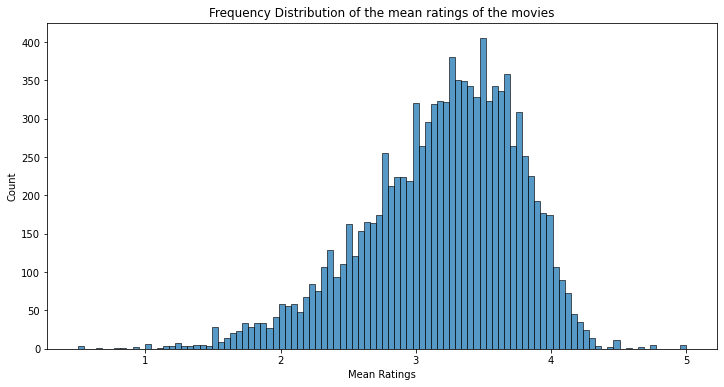

In [29]:
plt.rcParams['figure.figsize'] = (12,6)
sns.histplot(ratings_count_mean['mean'], bins = 100)
plt.xlabel('Mean Ratings')
plt.title("Frequency Distribution of the mean ratings of the movies")
plt.show()

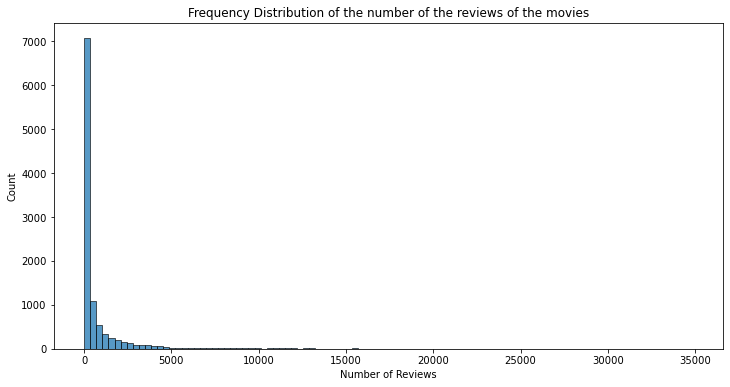

In [30]:
plt.rcParams['figure.figsize'] = (12,6)
sns.histplot(ratings_count_mean['count'], bins = 100)
plt.xlabel('Number of Reviews')
plt.title("Frequency Distribution of the number of the reviews of the movies")
plt.show()

In [31]:
ratings_count_mean[ratings_count_mean['mean'] == 5]

,Title,count,mean
10436,Satan's Tango (Sátántangó) (1994),2.0,5.0
10576,"Blue Light, The (Das Blaue Licht) (1932)",1.0,5.0
10577,Fighting Elegy (Kenka erejii) (1966),1.0,5.0
10578,Shadows of Forgotten Ancestors (1964),1.0,5.0
10579,Sun Alley (Sonnenallee) (1999),1.0,5.0


In [32]:
# seeing the movies which were reviewed the most and with the best reviews
ratings_count_mean.sort_values(by = ['count','mean'], ascending = False).head(20)

,Title,count,mean
0,Pulp Fiction (1994),34864.0,4.157426
1,Forrest Gump (1994),34457.0,4.013582
2,"Silence of the Lambs, The (1991)",33668.0,4.204200
3,Jurassic Park (1993),32631.0,3.661564
4,"Shawshank Redemption, The (1994)",31126.0,4.457238
5,Braveheart (1995),29154.0,4.082390
6,"Fugitive, The (1993)",28951.0,4.006925
7,Terminator 2: Judgment Day (1991),28948.0,3.927698
8,Star Wars: Episode IV - A New Hope (a.k.a. Star Wars) (1977),28566.0,4.220209
9,Apollo 13 (1995),27035.0,3.887350


In [33]:
# seeing the movies with the least number of reviews
ratings_count_mean.tail(100)

,Title,count,mean
10576,"Blue Light, The (Das Blaue Licht) (1932)",1.0,5.0
10577,Fighting Elegy (Kenka erejii) (1966),1.0,5.0
10578,Shadows of Forgotten Ancestors (1964),1.0,5.0
10579,Sun Alley (Sonnenallee) (1999),1.0,5.0
10580,Bad Blood (Mauvais sang) (1986),1.0,4.5
...,...,...,...
10671,"Monkey's Tale, A (Les Château des singes) (1999)",1.0,1.0
10672,Relative Strangers (2006),1.0,1.0
10673,Stacy's Knights (1982),1.0,1.0
10674,Accused (Anklaget) (2005),1.0,0.5


## Item Based collaborative filtering on one movie sample

In [34]:
userid_movietitle_matrix = pd.pivot_table(data = movies_rating, index='UserID', columns= 'Title', values = 'Rating')

In [35]:
userid_movietitle_matrix.head(3)

Title,"""Great Performances"" Cats (1998)",'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...All the Marbles (a.k.a. The California Dolls) (1981),...And God Created Woman (Et Dieu... créa la femme) (1956),...And God Spoke (1993),...And Justice for All (1979),...,Zorba the Greek (Alexis Zorbas) (1964),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),[Rec] (2007),eXistenZ (1999),ffolks (a.k.a. North Sea Hijack) (1980),loudQUIETloud: A Film About the Pixies (2006),xXx: State of the Union (2005),"Âge d'or, L' (1930)"
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
titanic = userid_movietitle_matrix['Titanic (1997)']

In [37]:
pulp_fiction = userid_movietitle_matrix['Pulp Fiction (1994)']

In [38]:
# finding the correlation of every movie with the movie Titanic
titanic_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(titanic), columns = ['Correlation'])

C:\Users\shamb\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\shamb\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [39]:
titanic_correlations = titanic_correlations.reset_index(drop = False)

In [40]:
# adding the count of the correlations
titanic_correlations = titanic_correlations.join(ratings_count_mean['count'])

In [41]:
titanic_correlations= titanic_correlations.sort_values(by = ['Correlation', 'count'], ascending=False)

In [42]:
# dropping the null values
titanic_correlations.dropna(inplace = True)

In [43]:
# only retaining the movies which have been reviewed at least 100 times
titanic_correlations  = titanic_correlations[titanic_correlations['count'] >= 80]

In [44]:
titanic_correlations.head(10)

,Title,Correlation,count
649,Autism: The Musical (2007),1.0,3831.0
1226,"Bloody Child, The (1996)",1.0,2035.0
1307,Boot Camp (2007),1.0,1880.0
2100,Confessions of a Superhero (2007),1.0,955.0
2153,Costa Brava (1946),1.0,918.0
2634,Diminished Capacity (2008),1.0,644.0
2966,Elstree Calling (1930),1.0,514.0
3651,"Funeral, The (Ososhiki) (1984)",1.0,341.0
3796,Girl in the Cadillac (1995),1.0,311.0
3924,"Goodbye, 20th Century (Zbogum na dvadesetiot vek) (1998)",1.0,288.0


In [45]:
# Repeating the same steps to find the movies most correlated with Pulp Fiction
pulp_fiction_correlation = pd.DataFrame(userid_movietitle_matrix.corrwith(pulp_fiction), columns = ['Correlation'])

C:\Users\shamb\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\shamb\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [46]:
pulp_fiction_correlation = pulp_fiction_correlation.reset_index(drop = False)

In [47]:
# adding the number of times each movie has been reviewed
pulp_fiction_correlation= pulp_fiction_correlation.join(ratings_count_mean['count'])

In [48]:
# sorting the dataframe by correlations then the count
pulp_fiction_correlation= pulp_fiction_correlation.sort_values(by = ['Correlation', 'count'], ascending=False)

In [49]:
# dropping the null values
pulp_fiction_correlation.dropna(inplace=True)

In [50]:
# removing the movies which have been reviewed fewer than 80 times
pulp_fiction_correlation = pulp_fiction_correlation[pulp_fiction_correlation['count'] >= 80]

In [51]:
pulp_fiction_correlation.head(10)

,Title,Correlation,count
282,Aleksandra (2007),1.0,7646.0
514,Anthony Adverse (1936),1.0,4590.0
706,Babymother (1998),1.0,3591.0
1769,Cet amour-là (2001),1.0,1242.0
2434,Dead Fury (2008),1.0,748.0
2437,Dead Leaves (2004),1.0,747.0
2992,"End of Summer, The (Kohayagawa-ke no aki) (1961)",1.0,503.0
3924,"Goodbye, 20th Century (Zbogum na dvadesetiot vek) (1998)",1.0,288.0
4100,"Hallelujah Trail, The (1965)",1.0,259.0
4408,"Hole in My Heart, A (Ett Hål i mitt hjärta) (2004)",1.0,219.0


## Item-based collaborative filtering for entire dataset

In [52]:
movie_correlation = userid_movietitle_matrix.corr(min_periods=80)

In [54]:
movie_correlation.head(5)

Title,"""Great Performances"" Cats (1998)",'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...All the Marbles (a.k.a. The California Dolls) (1981),...And God Created Woman (Et Dieu... créa la femme) (1956),...And God Spoke (1993),...And Justice for All (1979),...,Zorba the Greek (Alexis Zorbas) (1964),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),[Rec] (2007),eXistenZ (1999),ffolks (a.k.a. North Sea Hijack) (1980),loudQUIETloud: A Film About the Pixies (2006),xXx: State of the Union (2005),"Âge d'or, L' (1930)"
Title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,1.0,NaN,0.270493,NaN,NaN,NaN,0.122747,...,NaN,NaN,NaN,NaN,NaN,0.305347,NaN,NaN,NaN,NaN
'night Mother (1986),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Testing the Recommender System

In [119]:
sample_ratings = pd.read_csv('My_Ratings.csv')

In [120]:
sample_ratings

,Movie Name,Ratings
0,Liar Liar (1997),5.0
1,"Pest, The (1997)",1.0
2,Citizen Kane (1941),4.5


In [110]:
sample_ratings.iloc[1, 0]

'Pest, The (1997)'

In [121]:
sample_ratings['Movie Name'][2]

'Citizen Kane (1941)'

In [122]:
similar_movies_list = pd.Series()
for i in range(1):
    i = 2
    try:
        similar_movie = movie_correlation[sample_ratings['Movie Name'][i]].dropna()
        similar_movie = similar_movie.map(lambda x : x * sample_ratings['Ratings'][i])
        similar_movies_list = similar_movies_list.append(similar_movie)
    except:
        print('Sorry, the movie {} is not in our database'.format(['Movie Name'][i]))

<ipython-input-122-88a752e5fd8e>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  similar_movies_list = pd.Series()


In [123]:
similar_movies_list.sort_values(ascending=False, inplace = True)

In [124]:
similar_movies_list[1:]

Little Caesar (1931)                              2.817085
Magnificent Ambersons, The (1942)                 2.576188
Trouble in Paradise (1932)                        2.450534
Sunrise: A Song of Two Humans (1927)              2.264031
My Darling Clementine (1946)                      2.254411
                                                    ...   
Iron Eagle IV (1995)                             -1.591306
Grandma's Boy (2006)                             -1.605391
What's the Worst That Could Happen? (2001)       -1.610641
Cannonball Run III (a.k.a. Speed Zone!) (1989)   -1.616267
Whipped (2000)                                   -1.620750
Length: 5095, dtype: float64

In [95]:
if ('Jumanji (1995)' in movies_raw['Title'].values):
    print("Yes")
    
    
# movies_raw['Title'].values    

Yes
